# Elektromechanikus oszcillátorok


Ismerkedjen meg az áramkörrel, tanulmányozza a felépítését a kapcsolási rajz és a nyákrajz alapján. 
A mérési feladatokat a kivezetett mérőpontokon végezze! **Figyelem**: a $K_1$ kapcsoló három állású kapcsoló, a középső állás a kikapcsolt állapotnak felel meg!

## 1. Feladatok a blocking oszcillátoros rendszer vizsgálatára

### 1.1. A gerjesztő jel vizsgálata - 4 pont

A rendszert a blocking oszcillátoros üzemmódban (a $K_1$ kapcsoló az A állásban) működtetve végezze el az alábbi méréseket! 
Először válassza le a tápegységet, és a forgót kézzel óvatosan hajtva, az oszcilloszkóp segítségével mérje meg a blocking áramkör tranzisztorának ($Tr_2$) bázisán létrejövő jelalakot. Az oszcilloszkóp `STOP` gombjával kimerevített adatsort le tudja a számítógépre tölteni.

- Készítse el a jelalak rajzát!
- Magyarázza meg, miért nem kap a mérési leírás 2. ábrája szerinti szimmetrikus hullámalakot.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import csv
from scipy.optimize import curve_fit

Text(0.5,1,'Blocking $Tr_2$ meres1')

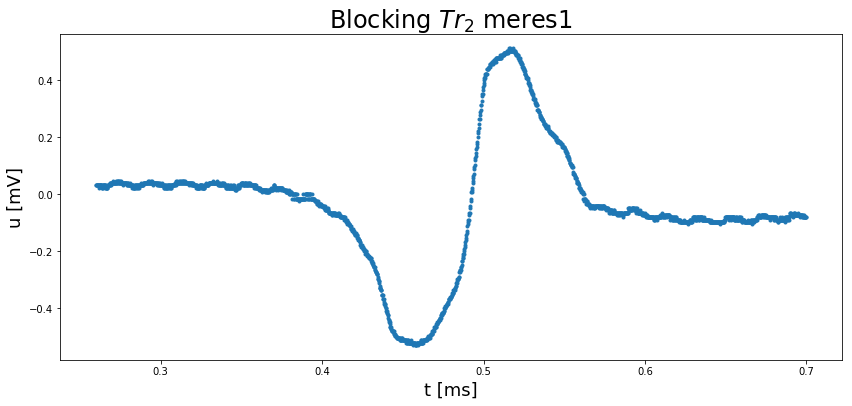

In [2]:
# oszcillogram
#data1 = np.genfromtxt('MERES.dat')
data1=np.array([[ float(o) for o in i.split() ] for i in open("MERES.dat")])

plt.figure(figsize=(14,6))
plt.plot(data1[1300:-500,0],data1[1300:-500,1],'.')
plt.xlabel("t [ms]",fontsize=18)
plt.ylabel("u [mV]",fontsize=18)
plt.title("Blocking $Tr_2$ meres1",fontsize=24)

Text(0.5,1,'Blocking $Tr_2$ meres2')

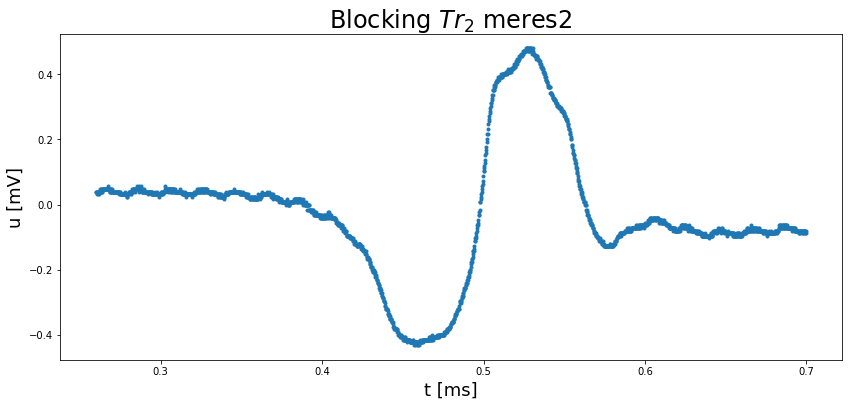

In [3]:
data2=np.array([[ float(o) for o in i.split() ] for i in open("MERES2.dat")])

plt.figure(figsize=(14,6))
plt.plot(data2[1300:-500,0],data2[1300:-500,1],'.')
plt.xlabel("t [ms]",fontsize=18)
plt.ylabel("u [mV]",fontsize=18)
plt.title("Blocking $Tr_2$ meres2",fontsize=24)

Az asszimetriát valószínűleg az okozza, hogy a forgást folyamatosan lassítja a surlódás és a közegellenállás.

### 1.2. A blocking áramkör teljesítményfelvétele

Kösse be a tápegységet, és állítsa be a feszültséget 10 V-ra. 

#### 1.2.1. Rögzítse az $R_4$ kollektor ellenálláson keletkező jel alakját - 2 pont 

A rajzon jelölje be az alábbi táblázat paramétereit: 

- $u_1$, $u_2$ a trapéz alakú impulzus amplitúdói;
- $t$ az impulzus szélessége és $T$ az áramimpulzusok periódus ideje. 

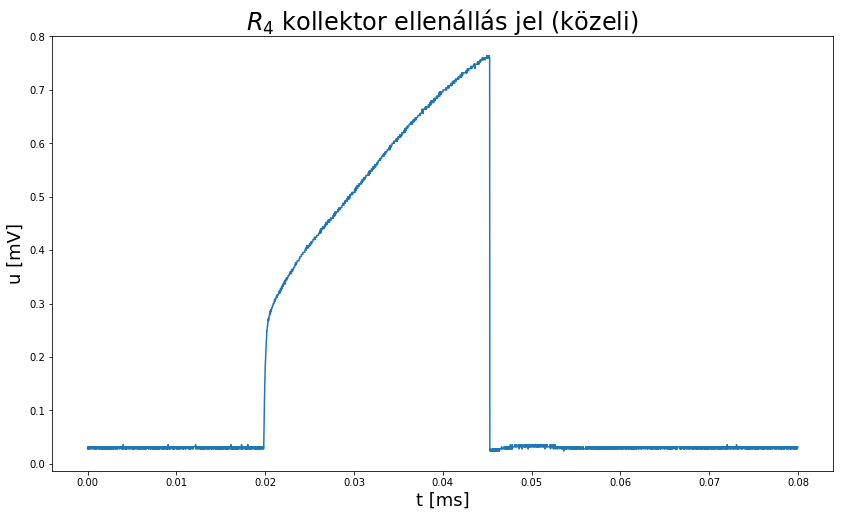

In [4]:
# annotált oszcillogram
#data2=[[ float(o) for o in i.split() ] for i in open("MERES3.dat")]
#data2sz=[[ float(o) for o in i.split() ] for i in open("MERES3sz.dat")]

MERES3 = np.genfromtxt('MERES3.dat')
plt.figure(figsize=(14,8))
plt.plot(MERES3[:,0],MERES3[:,1])
plt.xlabel("t [ms]",fontsize=18)
plt.ylabel("u [mV]",fontsize=18)
plt.title("$R_4$ kollektor ellenállás jel (közeli)",fontsize=24)
plt.savefig('t.jpg')

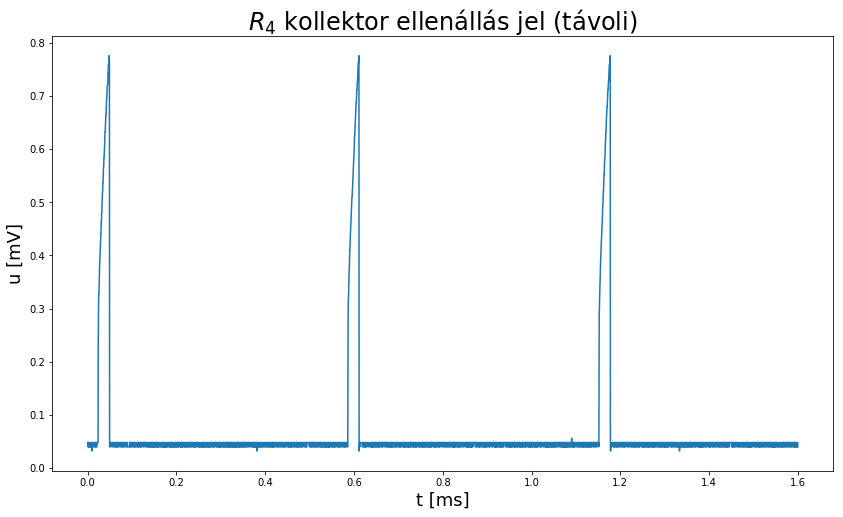

In [5]:
MERES3sz = np.genfromtxt('MERES3sz.dat')
plt.figure(figsize=(14,8))
plt.plot(MERES3sz[:,0],MERES3sz[:,1])
plt.xlabel("t [ms]",fontsize=18)
plt.ylabel("u [mV]",fontsize=18)
plt.title("$R_4$ kollektor ellenállás jel (távoli)",fontsize=24)
plt.savefig('T.jpg')

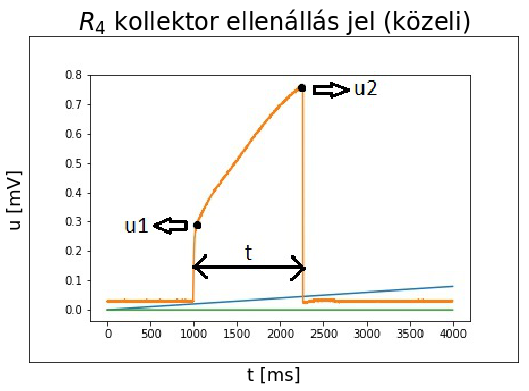

In [6]:
plt.figure(figsize=(12,6))
plt.xlabel("t [ms]",fontsize=18)
plt.ylabel("u [mV]",fontsize=18)
plt.xticks([])
plt.yticks([])
plt.title("$R_4$ kollektor ellenállás jel (közeli)",fontsize=24)
tk=plt.imread("tk.jpg")
plt.imshow(tk)

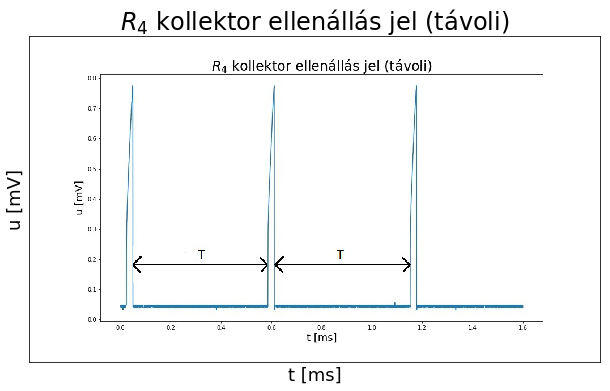

In [7]:
plt.figure(figsize=(12,6))
plt.xlabel("t [ms]",fontsize=18)
plt.ylabel("u [mV]",fontsize=18)
plt.xticks([])
plt.yticks([])
plt.title("$R_4$ kollektor ellenállás jel (távoli)",fontsize=24)
Tn=plt.imread("Tn.jpg")
plt.imshow(Tn)

#### 1.2.2. Érdekes jellemzők meghatározása - 4 pont

Határozza meg az alábbi kifejezések képletét a fent bevezetett paraméterek ismeretében. Vezesse le ezek hibáját is!
- $R_4=10$ $\Omega$
- $U_{atl}=\dfrac{u_1+u_2}{2}$
- $\delta U_{atl}=\dfrac{\delta u_1+\delta u_2}{2}=\dfrac{20mV+20mV}{2}=20mV$
- Az átlagáram képlete, $I=\dfrac{U_{atl}}{R_4}$
- $\delta I=\dfrac{\delta U_{atl}}{R_4}=\dfrac{20mV}{10 \Omega}=2mA$
- A teljesítmény képlete, $P=U \cdot I$
- $\delta P=|I \cdot \delta U| +|U \cdot \delta I|$
- A szögsebesség képlete, $\omega=\dfrac{2 \cdot \pi}{T}$
- $\delta \omega=\dfrac{2 \pi \delta T}{T^2}$

#### 1.2.3. Teljesítmény feszültségfüggése - 4 pont


Az $U$ tápfeszültséget a 6 és a 13 V közötti tartományban változtatva végezze el a mérés és töltse ki a táblázatot. Pótolja a mértékegységeket a táblázat fejlécében.

Hibák a leolvasásból (legkisebb beosztás fele):

- dU=0.005 V
- du=20 mv
- dt=0.5 ms
- dT=10 ms

In [8]:
#A kérdezett értékek és hibájuk:

R4=10 #Ohm
U=np.array([6,7,8,9,10,11,12,13]) #V
dU=0.005 #V
u1=np.array([140,160,200,240,300,320,340,380])/1000 #V
u2=np.array([340,480,580,680,780,860,960,1060])/1000 #V
du=0.02 #V
t=np.array([24,25,25.5,25,25,25,25.5,25.5])/1000 #s
dt=0.0005 #s
T=np.array([740,660,610,580,540,520,500,480])/1000 #s
dT=0.01 #s
Uatl=np.array([(u1[i]+u2[i])/2 for i in range(len(u1))]) #V
dUatl=(abs(du)+abs(du))/2 #V
I=Uatl/R4 #A
dI=dUatl/R4 #A
P=U*I #W
dP=abs(I*dU)+abs(U*dI) #W
omega=2*math.pi/T #rad/s
domega=2*math.pi*dT/(T**2) #rad/s

| Mérés száma     | $U$ [ V] | $u_1$  [  mV] |   $u_2$ [ mV ] | $t$ [ ms ] | $T$ [ ms ]  | $P$  [mW  ] | $\omega$ [$\dfrac{rad}{s} $  ]  |
| :-------:       |-------------  | :--------:| :---:     | :---:  | :---:   | :---:   | :---:         |
|1. | 6|140 |340 | 24| 740|144 |8,4908 |  
|2. | 7| 160| 480| 25| 660|224 |9,5200 |  
|3. | 8| 200| 580| 25,5| 610|312 |10,3003 |  
|4. | 9| 240| 680| 25| 580|414 |10,8331 |  
|5. | 10| 300| 780| 25| 540|540 |11,6355 |  
|6. | 11| 320| 860| 25| 520|649 |12,0830 |  
|7. | 12| 340| 960| 25,5| 500|780 |12,5664 |  
|8. | 13| 380| 1060| 25,5|480 |936 |13,0900 | 

Ábrázolja a szögsebességet a teljesítmény függvényében.

['A', 'B']
[5.83824797 7.67796224]
[0.21704668 0.30698874]


Text(0.5,1,'A szögsebesség teljesítményfüggése')

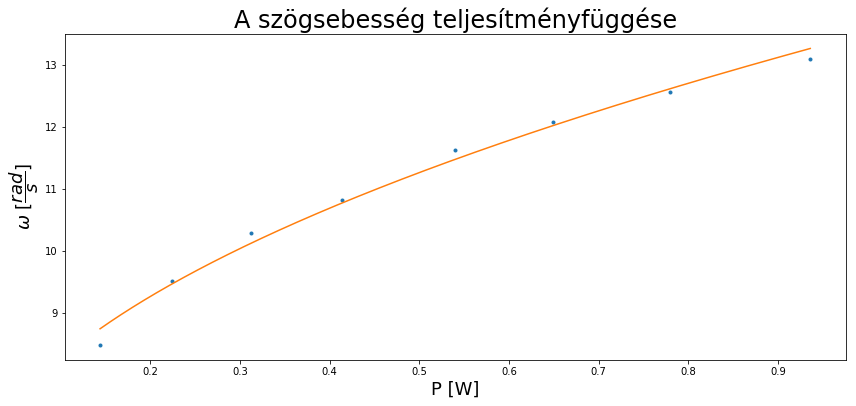

In [9]:
# adatrögzítés, ábrázolás és illesztés
def f(P,A,B):
    return A+B*P**(1/2.0)

A=0
B=1
popt, pcov = curve_fit(f, P, omega, p0=(A,B))
perr = np.sqrt(np.diag(pcov))      # az illesztési paraméterek hibáinak meghatározása
print (['A','B'])
print (popt)
print (perr)

plt.figure(figsize=(14,6))
plt.plot(P,omega,'.',label="Mért adatok")
x=np.linspace(P[0],P[-1],10000)
plt.plot(x,f(x,*popt),label="Illesztés ($A+B \cdot P^{\dfrac{1}{2}}$)")
plt.xlabel("P [W]",fontsize=18)
plt.ylabel("$\omega$ $[\dfrac{rad}{s}]$",fontsize=18)
plt.title("A szögsebesség teljesítményfüggése",fontsize=24)

## 2. A fénykapus rendszer vizsgálata. 

A fénykapus rendszer működtetéséhez kapcsolja át a $K_1$ kapcsolót a panelon jelzett B állásba!

### 2.1. A vezérlés vizsgálata - 3 pont

Az ($U$) tápfeszültséget állítsa 10 V-ra, a $P_1$ trimmer-potenciómétert középállásba. Mérje meg oszcilloszkóp
segítségével 
- a fénykapu fotótranzisztorának ($Tr_1$) kollektori jelalakját, és 
- a vezérlő tranzisztor ($Tr_2$) bázisán létrejövő jelalakot. 

Text(0.5,1,'$Tr_1$ kollektori jelalak')

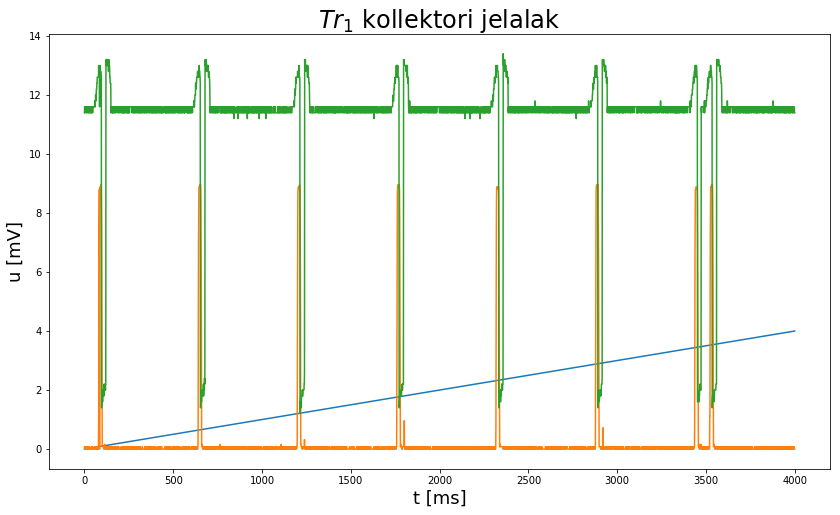

In [10]:
MERES21 = np.genfromtxt('MERES21.dat')
plt.figure(figsize=(14,8))
plt.plot(MERES21)
plt.xlabel("t [ms]",fontsize=18)
plt.ylabel("u [mV]",fontsize=18)
plt.title("$Tr_1$ kollektori jelalak",fontsize=24)

Text(0.5,1,'$Tr_2$ bázis jelalak')

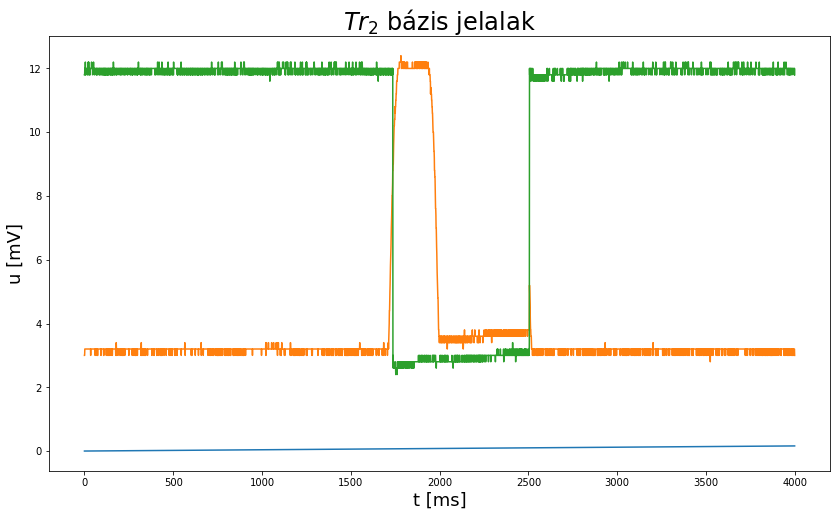

In [11]:
plt.figure(figsize=(14,8))
MERES21b = np.genfromtxt('MERES21b.dat')
plt.plot(MERES21b)
plt.xlabel("t [ms]",fontsize=18)
plt.ylabel("u [mV]",fontsize=18)
plt.title("$Tr_2$ bázis jelalak",fontsize=24)

### 2.2. A vezérlés hangolása - 4 pont

Változtassa a monostabil áramkör időzítését a $P_1$ trimmer-potencióméter segítségével, és közben figyelje a
vezérlő tranzisztor ($Tr_2$) bázisán keletkező jelalakok változását. *Figyelem,* a változtatás lassan
tükröződik a fordulatszámon. 

A táblázatba kerüljön be a $Tr_2$ bázisán mért impulzus szélesség ($t_\mathrm{vez}$, a monostabil időzítő billenési ideje), a $Tr_1$ kollektori jelét jellemőz ($t_\mathrm{opt}$) valamint a becsült szögsebesség.

**Figyelem!** Az elektromechanikus oszcillátor optikai kapujáról a jelalat a PC hangkártyájára is ki van vezetve. Az egyes mérések mellé rögzítse az adatokat hangfájlba, későbbi elemzés céljából.

| Mérés Száma | $t_\mathrm{vez} [ms]$ | $t_{opt} [ms]$ | $\omega$ |
|:-----------:|:---------:|:----------:|:-------------:|
|      1.     |      6     |      3      |1047               |
|      2.     |      7     |      3      | 897              |
|      3.     |      8     |      3      | 785              |
|      4.     |      8,5     |    3        |739               |
|      5.     |      10     |     3       | 628              |
|      6.     |      13     |     3       | 483       |

- Készítsen a mérésről ábrát!
- Mikor a leggyorsabban a forgás?

Text(0.5,1,'Vezérlés')

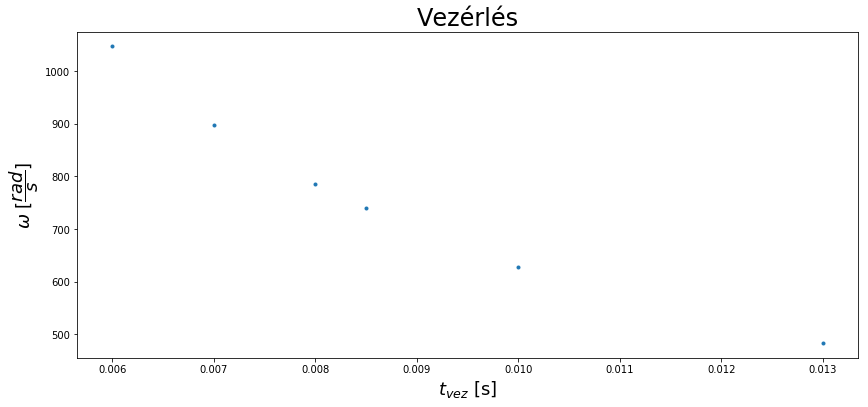

In [12]:
#EZ A FELADAT ROSSZ!

tvez=np.array([6,7,8,8.5,10,13])/1000 #s
topt=np.array([3,3,3,3,3,3])/1000 #s
omega=2*math.pi/tvez

plt.figure(figsize=(14,6))
plt.plot(tvez,omega,'.')
plt.xlabel("$t_{vez}$ [s]",fontsize=18)
plt.ylabel("$\omega$ $[\dfrac{rad}{s}]$",fontsize=18)
plt.title("Vezérlés",fontsize=24)

#akkor a leggyorsabb a forgás, ha tvez a legkisebb

### 2.3. Szögsebesség program írása - 4 pont

A hangfájlban impulzusokat rögzítünk. Készítsen `python` eljárást, ami az egymás utáni impulzusokat megtalálja, és szögsebességet becsül.

Ábrázolja a korábbi mérés egyik felvételének időfejlődését. A grafikonra nagytva mit tapasztal? Magyarázza a tapasztaltakat!

In [13]:
from scipy.io import wavfile
fs1, data1 = wavfile.read('3.1.wav')
t1=np.linspace(0,len(data1)/fs1,len(data1))
fs2, data2 = wavfile.read('3.2.wav')
t2=np.linspace(0,len(data2)/fs2,len(data2))
fs3, data3 = wavfile.read('3.3.wav')
t3=np.linspace(0,len(data3)/fs3,len(data3))
fs4, data4 = wavfile.read('3.4.wav')
t4=np.linspace(0,len(data4)/fs4,len(data4))
fs5, data5 = wavfile.read('3.5.wav')
t5=np.linspace(0,len(data5)/fs5,len(data5))
fs6, data6 = wavfile.read('3.6.wav')
t6=np.linspace(0,len(data6)/fs6,len(data6))

In [14]:
def csucsok(y,korlat):
    maxi=[]
    for i in range(len(y)):
        if (y[i]>korlat):
            maxi.append(i)
    maxi_felbont=[]
    maxi_tag=[]
    for i in range(len(maxi)-1):
        maxi_tag.append(maxi[i])
        if ((maxi[i+1]-maxi[i])>1):
            maxi_felbont.append(maxi_tag)
            maxi_tag=[]
    maxered=np.array([min(maxi_felbont[i]) for i in range(len(maxi_felbont))])
    #maxered=[np.where(y==max([y[j] for j in i])) for i in maxi_felbont]
    return maxered

def omega_szamol(csucsokx,fs):
    T=[]
    for i in range(1,len(csucsokx)):
        T.append(csucsokx[i]-csucsokx[i-1])
    T=np.array(T)
    T=(T.mean())/fs
    return 2*math.pi*T

w1=omega_szamol(csucsok(data1[:,1],2000),fs1)
w2=omega_szamol(csucsok(data2[:,1],2000),fs2)
w3=omega_szamol(csucsok(data3[:,1],2000),fs3)
w4=omega_szamol(csucsok(data4[:,1],2000),fs4)
w5=omega_szamol(csucsok(data5[:,1],2000),fs5)
w6=omega_szamol(csucsok(data6[:,1],2000),fs6)
print("w{}={}Hz".format(1,w1))
print("w{}={}Hz".format(2,w2))
print("w{}={}Hz".format(3,w3))
print("w{}={}Hz".format(4,w4))
print("w{}={}Hz".format(5,w5))
print("w{}={}Hz".format(6,w6))


w1=1.9945140465812625Hz
w2=1.9855435474116716Hz
w3=1.9923359290436566Hz
w4=1.9912641689550048Hz
w5=1.9818883047276918Hz
w6=1.9886525741550203Hz


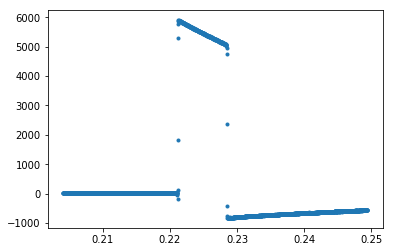

In [15]:
plt.plot(t2[9000:11000],data2[9000:11000,1],'.')

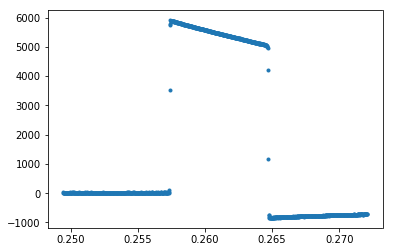

In [16]:
plt.plot(t1[11000:12000],data1[11000:12000,1],'.')

Tapasztalat: Doppler jelenség.
A közeledő fázisban a mikrofon nagyobb frekvenciát mér, mint a távolodóban, ezért alacsonyabb a csúcs utáni alapvonal és ezért hegyesebb a csúcs bal oldala, mint a jobb.

### 2.4. A be- és kikapcsolási jelenség - 4 pont

Állítsa meg a forgást. Az $U$ tápfeszültséget állítsa 10 V-ra, a $P_1$ trimmer-potenciómétert középállásba, majd
egy kis lökéssel idítsa újra a forgást. Mikor kellően felgyorsult, $K_1$ kapcsolót állítsa középállásba, ezzel
megszünteti a $Tr_2$ vezérlését. 

Mérés közben a rögzítse hangfájlba a $Tr_1$ kolletorkörében mérhető jelet. 

- Eljárására támaszkodva, készítse el a gyorsuló, az állandó és a lassuló szakaszt ábrázoló grafikont!
- Elemezze a fenti grafikont! Milyen arányban áll a gyorsulás a lassuláshoz képest?

In [17]:
fsl, datal = wavfile.read('lassulas.wav')
tl=np.linspace(0,len(datal)/fs1,len(datal))

csucs=csucsok(datal[:,1],2000)
dcsucs=np.array([csucs[i]-csucs[i-1] for i in range(1,len(csucs))])

i1=0
for i in range(len(dcsucs)-1):
    if(dcsucs[i]<dcsucs[i+1]):
        i1=i+1
        break
i2=0
for i in range(len(dcsucs)-1,0,-1):
    if(dcsucs[i]<dcsucs[i-1]):
        i2=i+1
        break
print(csucs[i1]) #eddig gyorsul
print(csucs[i2]) #innentől lassul

1347882
1443655


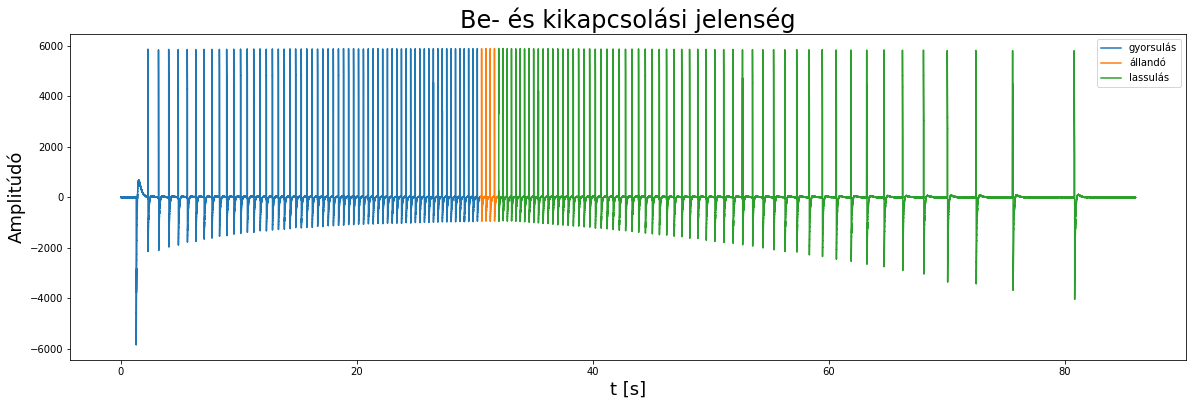

In [18]:
plt.figure(figsize=(20,6))
plt.plot(tl[:1344882],datal[:1344882,1],label='gyorsulás')
plt.plot(tl[1344882:1411894],datal[1344882:1411894,1],label='állandó')
plt.plot(tl[1411894:],datal[1411894:,1],label='lassulás')
plt.title("Be- és kikapcsolási jelenség",fontsize=24)
plt.xlabel("t [s]",fontsize=18)
plt.ylabel("Amplitúdó",fontsize=18)
plt.legend()

A rendszer lassulása tovább tartott, mint a gyorsulása, az állandó szakasz volt pedig a legrövidebb tartomány. A gyorsulás üteme lassabb volt, mint a lassulásé (a szögsebesség gyorsabban változott a lassulás során).